# Assignment 06 - [30 points] Solutions

## <u>Case Study</u>: Fashion MNIST Dataset Analysis

In this analysis, we will explore a random sample of another popular machine learning benchmark dataset known as the "Fashion MNIST" dataset. This dataset is comprised of 500 28-by-28 pixel images of fashion items. Each of the 784 image pixels is represented by a numerical gray scale value which can range from 0 (black) to 255 (white). Each object has an associated pre-assigned class label, which corresponds to the fashion item that the image is a picture of. The 10 types of fashion items included in this dataset are: Pullover, Sandal, Bag, Ankle boot, Coat, Shirt, T-shirt/top, Sneaker, Dress, and Trousers.

The performance of many machine learning algorithms, especially when applied to image data, can be heavily influenced by the nature and efficacy of the data pre-processing steps that were taken. A course in computer vision would be able to more extensively discuss these specific image pre-processing steps to get better performance from our machine learning algorithms when applied to image data. For the purpose of this unsupervised learning class, this Fashion MNIST dataset is a good dataset to start with, as these images do not require a lot of data pre-processing in order to get insightful results from our machine learning algorithms.


### <u>Research Questions</u>:

We would like to answer the following research questions about the dataset.
* Is this dataset clusterable? If so, how many, what are their shapes and sizes (ie. number of objects in them), and are they well-separated?
* How do these clusters associate with the 10 fashion item types?
* Are there some fashion items that may have two or more subtypes?
* Which fashion items are more easily distinguishable by a machine learning algorithm?
* Are there images that have higher image uncertainty as to the type of fashion item that it is an image of? What types of images do we most think that these images are?


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.metrics import adjusted_rand_score
from skfuzzy.cluster import cmeans

### 1. Data Preprocessing

This dataset does not have any missing values.

* Read the fashion_mnist_sample.csv into a dataframe.
* Create another dataframe that contains just the scaled numerical pixel attributes. You should scale these pixel attributes by dividing each of the values by 255.
* Create another dataframe that contains the scaled numerical variables and the fashion item class labels.

In [2]:
df = pd.read_csv('fashion_mnist_sample.csv')

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,Dress,0,0,0,0,0,0,0,0,0,...,162,176,128,0,0,0,0,0,0,0
1,Shirt,0,0,0,0,0,0,0,0,0,...,117,57,0,0,0,0,0,0,0,0
2,Trousers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sandal,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bag,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = df.iloc[:, 1:]/255
df_scaled = X.copy()
df_scaled["label"] = df.label

In [5]:
df_scaled.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027451,...,0.690196,0.501961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Dress
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007843,...,0.223529,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Shirt
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trousers
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandal
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bag


### 2. Basic Descriptive Analytics

#### 2.1. Number of Each Fashion Item

Display the number of images of each type of fashion item.

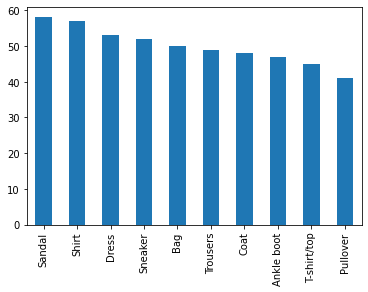

In [6]:
df_scaled.label.value_counts().plot.bar()
plt.show()

#### 2.2. Fashion Item Images

Display the first four images of each type of fashion item in the dataset.

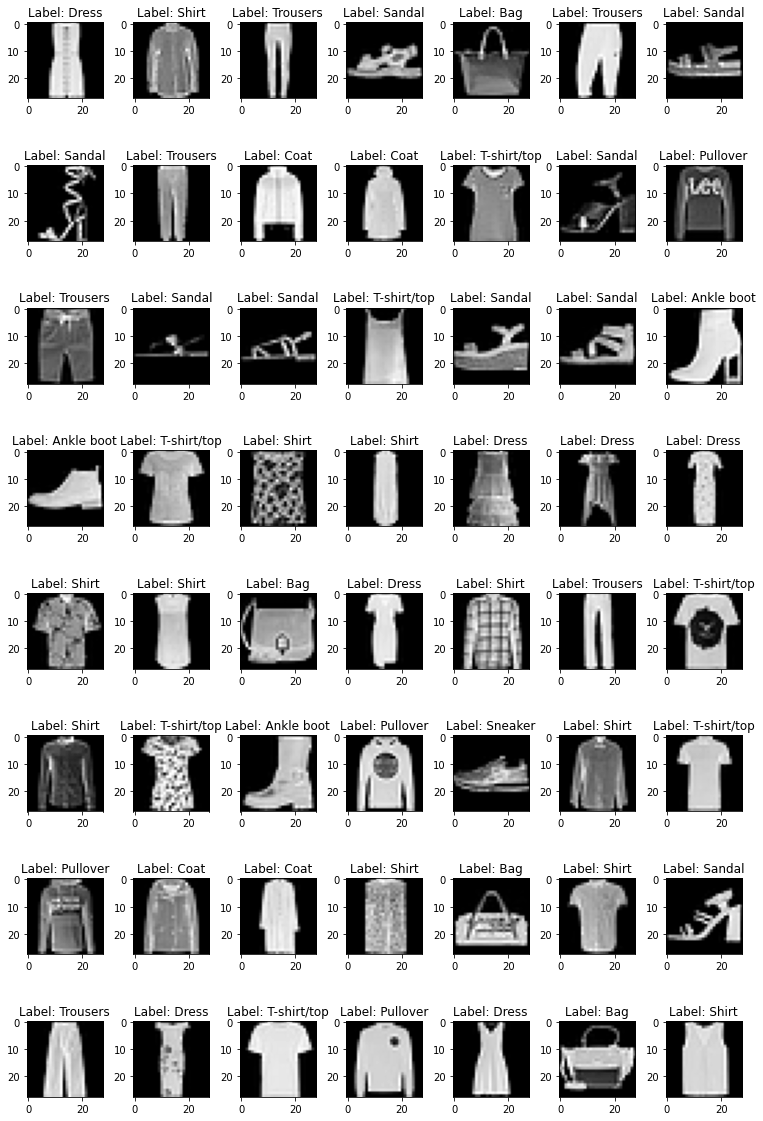

In [7]:
# specify the number of rows and columns you want to see
num_row = 8
num_col = 7

# get a segment of the dataset
num = num_row*num_col
labels = df.label[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    img_obj = np.array(X.iloc[i,:]).reshape((28,28))*255
    ax = axes[i//num_col, i%num_col]
    ax.imshow(img_obj, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#### 2.3. Average Fashion Item Image

Calculate the average of the images corresponding to each fashion item type. Then display the resulting averaged image for each of the 10 fashion item types.

In [8]:
df_digit_averages=df.groupby(['label']).mean()
df_digit_averages

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
label,,,,,,,,,,,,,,,,,,,,,
Ankle boot,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.936170,3.148936,3.595745,3.255319,6.425532,4.659574,4.404255,3.744681,2.936170,0.787234
Bag,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.100000,0.280000,...,37.780000,31.360000,26.280000,20.240000,14.900000,10.400000,6.240000,3.820000,4.760000,1.240000
Coat,0.0,0.0,0.000000,0.041667,0.020833,0.041667,0.062500,0.520833,0.458333,3.395833,...,31.083333,25.500000,13.541667,50.458333,82.104167,67.562500,24.270833,2.729167,0.000000,0.000000
Dress,0.0,0.0,0.000000,0.000000,0.000000,0.018868,0.169811,1.396226,5.660377,13.056604,...,64.905660,47.830189,23.641509,6.056604,4.018868,2.509434,0.000000,0.000000,0.000000,0.000000
Pullover,0.0,0.0,0.048780,0.097561,0.048780,0.170732,2.682927,5.585366,9.170732,31.560976,...,19.195122,15.243902,22.658537,53.756098,78.609756,59.268293,31.536585,9.878049,2.195122,0.000000
Sandal,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.155172,3.706897,3.396552,4.379310,2.482759,2.396552,1.327586,2.896552,0.741379,0.000000
Shirt,0.0,0.0,0.017544,0.052632,0.105263,1.210526,1.017544,6.491228,13.228070,17.877193,...,45.807018,27.438596,19.298246,13.929825,34.526316,20.508772,9.631579,0.017544,0.000000,0.017544
Sneaker,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
T-shirt/top,0.0,0.0,0.133333,0.200000,0.200000,0.288889,3.400000,8.688889,25.177778,56.333333,...,108.200000,93.311111,76.844444,53.288889,13.711111,2.311111,0.222222,0.177778,0.000000,0.000000


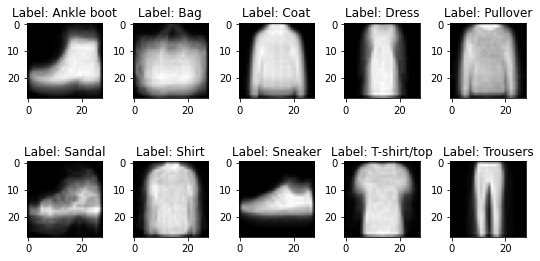

In [9]:
# specify the number of rows and columns you want to see
num_row = 2
num_col = 5

# get a segment of the dataset
num = num_row*num_col
labels = df_digit_averages.index[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    img_obj = np.array(df_digit_averages.iloc[i,:]).reshape((28,28))*255
    ax = axes[i//num_col, i%num_col]
    ax.imshow(img_obj, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

#### 2.4. Image Variability

What is a fashion item that you think has a high amount of image variability? Explain.

### 3. Clusterability

#### 3.1. t-SNE Plots
Using 6 different perplexity values and at least two random states for each perplexity value, map this 784 dimensional dataset onto a two-dimensional dataset with the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random states and perplexity value. Also, color code your points by the fashion item labels.

#### 3.2. Interpretation:

Use your t-SNE plots to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters are in this dataset? *[This is subjective. As long as the logic in your explanation is correct, you will get full credit].*
3. What is the shape of the clusters in this dataset? *[This is subjective. As long as the logic in your explanation is correct, you will get full credit].*
4. Are these clusters well separated? *[This is subjective. As long as the logic in your explanation is correct, you will get full credit].*
5. Describe the relationship between the clusters suggested by the t-SNE plots and the fashion item labels. *[This is subjective. As long as the logic in your explanation is correct, you will get full credit].*
6. Name one fashion item that may have different *sub-classes*. Explain why you think this.

Finally, pick out a random state and perplexity value that reflects the answers to your questions and show the corresponding t-SNE plot below.

### 4. Clustering Algorithm Selection

We would like to use fuzzy c-means to cluster this dataset for the following reasons.
* We would like for our clustering algorithm results to return more information than a traditional partition-based clustering algorithm. Specifically, we would like for our algorithm to return a matrix of cluster membership scores, reflecting the extent to which each object in the dataset belongs to each of the $c$ clusters.
* We would like to determine which of the fashion item images are more well separated from other fashion item images.
* We would like to determine which *individual* images have high cluster membership to a *single* particular cluster. How many of each type of fashion item images have high cluster membership to just a single cluster?
* We would like to determine which *individual* images do not have a high cluster membership to any single particular cluster. How many of each type of fashion item images DO NOT have high cluster membership to just any particular single cluster?

#### What is one reason why fuzzy c-means may *not* give the best performance for this dataset?


### 5. Fuzzy c-Means Parameter Selection

We will use Fuzzy c-means to cluster this dataset.

Because one of the goals of this analysis is to learn more about each of the 10 fashion items, we will cluster this dataset with $c=10$ clusters. We would like to select the ideal value of $p$ that gives us the most insightful results. We would ideally like for our fuzzy c-means clustering results to do the following.
1. It should give a harder set of cluster membership scores to objects that we think should have a more certain assignment to one particular cluster
2. It should give a fuzzier set of cluster membership scores to objects that we think would have more of an uncertain assignment to a set of two or more clusters.

Thus we want our fuzzy clustering results to be able to reflect the uncertain of the cluster assignment of straddle nodes, but reflect more certainty of the cluster assignments that have a high degree of belonging to a particular cluster.



#### 5.1. p=1.01

First, cluster the dataset using fuzzy c-means using c=10 clusters, p=1.01, and a random state of 100. Then display your clustering results in 10 t-SNE plots. The objects in your $kth$ t-SNE plot should be color-coded by their cluster membership scores to the $kth$ cluster.

#### 5.2. p=1.1

Cluster the dataset using fuzzy c-means using c=10 clusters, p=1.1, and a random state of 100. Then display your clustering results in 10 t-SNE plots. The objects in your $kth$ t-SNE plot should be color-coded by their cluster membership scores to the $kth$ cluster.

#### 5.3. p=1.7

Cluster the dataset using fuzzy c-means using c=10 clusters, p=1.7, and a random state of 100. Then display your clustering results in 10 t-SNE plots. The objects in your $kth$ t-SNE plot should be color-coded by their cluster membership scores to the $kth$ cluster.

#### 5.4. p=2

Finally, cluster the dataset using fuzzy c-means using c=10 clusters, p=2, and a random state of 100. Then display your clustering results in 10 t-SNE plots. The objects in your $kth$ t-SNE plot should be color-coded by their cluster membership scores to the $kth$ cluster.

#### 5.5. Parameter Selection

One of the goals of this cluster analysis is to return a fuzzy clustering result that:
* is able to identify the underlying clusters in the dataset,
* is able to reflect the uncertain nature of which clusters "straddle nodes" should belong to, and
* is able to reflect the more certain nature of which cluster highly cohesive objects belong to.

Which parameter value (p=1.01, 1.1, 1.7, or 2) creates the fuzzy clustering that best meets these goals? Explain. 

### 6. Post-Cluster Analysis

Using c=10, a random state of 100, and the best value of p that you selected in 5.5, cluster your dataset again using fuzzy-cmeans. Then use this clustering result to answer the following questions in #6.

#### 6.1. Centroids

Display the image of each cluster centroid.

#### 6.2. Fuzzy c-Means Clusters and Fashion Items

Use your centroid images, your t-SNE plot (color-coded by the fashion item labels), and your t-SNE plots (color-coded by the cluster membership weights) to determine which fashion item(s) most represents each of the 10 clusters. If it is ambiguous or a given cluster is highly represented by multiple fashion items explain this as well.

#### 6.3. Normalized Dunn's Partitioning Coefficient

What is the Normalized Dunn's Partitioning coefficient for this fuzzy clustering? What does this value say about the overall fuzziness of the clustering?

#### 6.4. Highest Cluster Membership Weights

Find the highest cluster membership weight for each object. Then plot these values in a histogram. Does your resulting histogram agree with what you interpreted in 6.3? Explain.

#### 6.5. Learning More about Straddle Nodes

Display the cluster membership weights for the 5 objects in the dataset that have the smallest highest cluster membership scores.

#### 6.6. Most Uncertain Image Assignment

Next, select the image that has the smallest highest cluster membership value. 
* Which three clusters does this object most belong to?
* What three types of fashion items is fuzzy c-means suggesting that this item is most likely to be?

#### 6.7. Visualizing this Image

Next, display the image that you selected in 6.6.

#### 6.8. Fashion Item Analysis

Next, for each of the 10 fashion items, calculate the median cluster membership score for each of the 10 clusters.

#### 6.9. Fashion Item with the High Cluster Dispersal

Using your answers from 6.8, which fashion item has it's object cluster membership scores most spread out amoungst multiple clusters? Explain.

#### 6.10. Membership Weight Histograms for Fashion Item with High Cluster Dispersal

For this fashion item that you selected in 6.9, plot 10 histograms, one for each of the 10 cluster membership weights assigned to images of this fashion item type.

#### 6.11 Fashion Items with the Highest Concentration in Just One Cluster

Using your results from 6.8, which five fashion items have their corresponding image weights *most* concentrated in just one particular cluster?

#### 6.12. Sandals Sub-Types

* Visualize the sandal that has the highest cluster membership weight for cluster 5. 
* Then visualize the sandal that has a highest cluster membership weight for cluster 4.

#### 6.13. The Variability of Sandals

Why do we think that this sandal in the image above did not have a high to cluster 5 membership score? 